In [3]:
import pandas

Dados obtidos por conversão das variáveis em R.
Usei o packages TCGA BioLinks para transferir e depois exportei.

A lógica
```r
write_csv(seqdata, 'seqdata.csv') # Para excluir os rownames e manter os nomes do gene
write_csv(meta, 'meta.csv', rownames = FALSE) # Para manter o barcode
```

In [4]:
seqdata = pandas.read_csv('./dataset/seqdata.csv')
seqdata.head()

,Unnamed: 0,TCGA-38-7271-01A-11R-2039-07,TCGA-55-7914-01A-11R-2170-07,TCGA-95-7043-01A-11R-1949-07,TCGA-73-4658-01A-01R-1755-07,TCGA-86-8076-01A-31R-2241-07,TCGA-55-7726-01A-11R-2170-07,TCGA-44-6147-01A-11R-A278-07,TCGA-50-5932-01A-11R-1755-07,TCGA-44-2661-01A-01R-1107-07,...,TCGA-50-5946-02A-11R-2090-07,TCGA-86-7713-01A-11R-2066-07,TCGA-86-8073-01A-11R-2241-07,TCGA-44-2662-01B-02R-A277-07,TCGA-MN-A4N4-01A-12R-A24X-07,TCGA-53-7626-01A-12R-2066-07,TCGA-62-A46O-01A-11R-A24H-07,TCGA-44-A47G-01A-21R-A24H-07,TCGA-55-6969-01A-11R-1949-07,TCGA-55-6969-11A-01R-1949-07
0,TSPAN6,1536,2936,1475,3659,3269,1188,2178,4545,4558,...,5188,8522,3418,667,3365,3249,5948,2272,2233,513
1,TNMD,0,0,0,188,0,0,4,0,0,...,0,0,0,10,0,0,0,0,0,1
2,DPM1,765,1447,1275,981,1540,1564,1430,1557,2089,...,2778,2548,2937,554,2244,1969,1174,851,2803,754
3,SCYL3,510,827,373,456,1171,269,1139,1185,1025,...,1031,2384,1008,716,777,1345,628,565,940,350
4,C1orf112,172,241,172,158,318,219,434,322,315,...,969,1790,592,619,451,427,572,199,647,73


In [5]:
meta = pandas.read_csv('./dataset/meta.csv')
meta.head()

,barcode,gender,expr
0,TCGA-38-7271-01A-11R-2039-07,female,NaN
1,TCGA-55-7914-01A-11R-2170-07,female,TRU
2,TCGA-95-7043-01A-11R-1949-07,female,prox.-prolif.
3,TCGA-73-4658-01A-01R-1755-07,female,prox.-inflam
4,TCGA-86-8076-01A-31R-2241-07,male,NaN


In [185]:
meta.isna().any()

barcode    False
gender     False
expr        True
dtype: bool

In [6]:
# Remover NAs do expr. subtype
meta_clean = meta.dropna(how='any')

if len(meta_clean) == 248:
    print(f'data set de subtipo de expressão contém 248 valores como esperado, com tamanho {len(meta_clean)}')

data set de subtipo de expressão contém 248 valores como esperado, com tamanho 248


In [7]:
# Filtrar seqdata com base no filtro
seqdata_clean = seqdata[meta_clean['barcode']] # Não é preciso validar pois as colunas já estão pelo nome

if seqdata_clean.shape[1] == 248:
    print(f'data set de dados de expressão corretamente filtrado, com tamanho {seqdata_clean.shape[1]}')

data set de dados de expressão corretamente filtrado, com tamanho 248


In [8]:
smoke_status = pandas.read_csv('./dataset/fumo.csv')

smoke_status = smoke_status.rename(columns={
    'data.paper_Smoking.Status' : 'Smoke Habits',
    'data.years_smoked' : 'Years Smoked'})

smoke_status.drop(columns=['Unnamed: 0'], inplace=True)
smoke_status['barcode'] = meta['barcode']

# Filtramos por Smoke Habits
smoke_status.isna().any()
smoke_status_clean = smoke_status[(smoke_status['Smoke Habits'].notna()) & (smoke_status['Smoke Habits'] != '[Not Available]')]
smoke_status_clean = smoke_status_clean[['barcode', 'Smoke Habits', 'Years Smoked']]
smoke_status_clean.head()

,barcode,Smoke Habits,Years Smoked
1,TCGA-55-7914-01A-11R-2170-07,Current smoker,NaN
2,TCGA-95-7043-01A-11R-1949-07,Current reformed smoker for < or = 15 years,39.0
3,TCGA-73-4658-01A-01R-1755-07,Current reformed smoker for > 15 years,NaN
5,TCGA-55-7726-01A-11R-2170-07,Current reformed smoker for > 15 years,24.0
6,TCGA-44-6147-01A-11R-A278-07,Current reformed smoker for > 15 years,4.0


In [9]:
vital = pandas.read_csv('./dataset/vital.csv')

vital.rename(columns={'data.barcode' : 'barcode', 'data.vital_status' : 'Vital Status'}, inplace=True)

vital_vs_smoke = pandas.merge(
    smoke_status_clean,
    vital,
    on = 'barcode',
    how = 'inner'
)

vital_vs_smoke = vital_vs_smoke[['barcode', 'Smoke Habits', 'Years Smoked', 'Vital Status']]
vital_vs_smoke.head()

,barcode,Smoke Habits,Years Smoked,Vital Status
0,TCGA-55-7914-01A-11R-2170-07,Current smoker,NaN,Dead
1,TCGA-95-7043-01A-11R-1949-07,Current reformed smoker for < or = 15 years,39.0,Dead
2,TCGA-73-4658-01A-01R-1755-07,Current reformed smoker for > 15 years,NaN,Dead
3,TCGA-55-7726-01A-11R-2170-07,Current reformed smoker for > 15 years,24.0,Alive
4,TCGA-44-6147-01A-11R-A278-07,Current reformed smoker for > 15 years,4.0,Alive


In [246]:
stage = pandas.read_csv('./dataset/stage.csv')
stage.drop(columns=['Unnamed: 0'], inplace=True)

stage = stage.rename(columns={'data$paper_Tumor.stage' : 'Tumor Stage'})

stage['barcode'] = meta['barcode']

print(f'encontrados {stage.iloc[:, 0].isna().sum()} valores omissos',
           'foi criada uma versão filtrada')

stage_clean = stage.dropna(how='any')
stage_clean[stage_clean['barcode'].isin(meta['barcode'])]
stage_clean




encontrados 352 valores omissos foi criada uma versão filtrada


,Tumor Stage,barcode
1,Stage IIA,TCGA-55-7914-01A-11R-2170-07
2,Stage IA,TCGA-95-7043-01A-11R-1949-07
3,Stage IB,TCGA-73-4658-01A-01R-1755-07
5,Stage IA,TCGA-55-7726-01A-11R-2170-07
6,Stage IA,TCGA-44-6147-01A-11R-A278-07
...,...,...
588,Stage IIA,TCGA-50-5055-01A-01R-1628-07
589,Stage IIB,TCGA-38-4628-01A-01R-1206-07
591,Stage IB,TCGA-86-7713-01A-11R-2066-07
593,Stage IB,TCGA-44-2662-01B-02R-A277-07


<Axes: xlabel='Vital Status'>

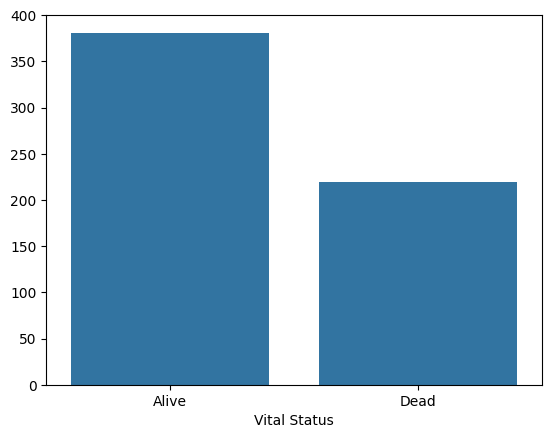

In [23]:
"""
Gráficos a correlacionar:

- smoke status com vital status?
- vital status vs stage?
"""
import seaborn

# Equivalente a table(dados)
vital_status = vital['Vital Status'].value_counts()
#vital_status

seaborn.barplot(x = vital_status.index, y = vital_status.values)

<Axes: xlabel='Smoke Habits'>

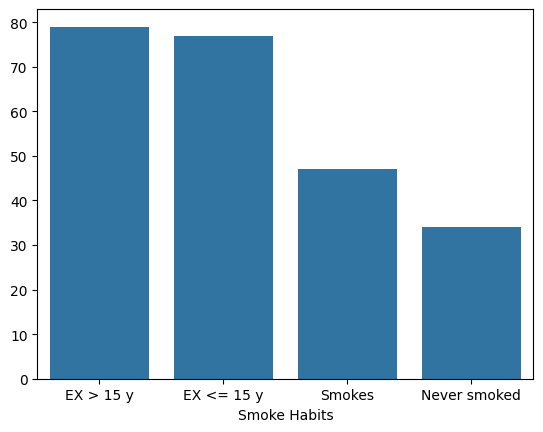

In [33]:
smoke_habit = smoke_status_clean['Smoke Habits'].value_counts()
smoke_habit = smoke_habit.rename({
    'Current reformed smoker for > 15 years': 'EX > 15 y',
    'Current reformed smoker for < or = 15 years': 'EX <= 15 y',
    'Current smoker' : 'Smokes',
    'Lifelong Non-smoker' : 'Never smoked',
})

seaborn.barplot(x = smoke_habit.index, y = smoke_habit.values)